In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0, 10.0, num=1000000, dtype=np.float32)
m = 0.78
b = 3.0
y_data = x_data * m + b + np.random.randn(len(x_data))

In [4]:
df_x = pd.DataFrame(data=x_data, columns=['X data'], dtype=np.float32)
df_y = pd.DataFrame(data=y_data, columns=['Y Labels'], dtype=np.float32)

df_training = pd.concat([df_x, df_y], axis=1)

In [5]:
df_training.sample(2)

,X data,Y Labels
838004,8.380049,8.668947
370458,3.704584,6.044069


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


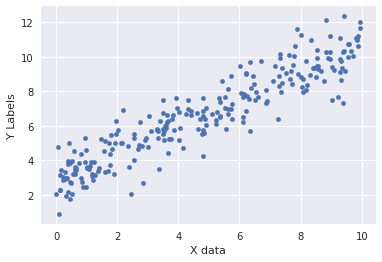

In [6]:
df_training.sample(250).plot(kind='scatter',x='X data',y='Y Labels')

In [7]:
feat_cols = [tf.feature_column.numeric_column('X_data', shape=(1,), dtype=tf.float32)]

In [8]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f64689bbeb8>, '_is_chief': True, '_num_ps_replicas': 0, '_evaluation_master': '', '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_tf_random_seed': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_train_distribute': None, '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_model_dir': '/tmp/tmpzaysmpk8', '_task_id': 0, '_session_config': None, '_service': None}


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_data, test_size=0.30, random_state=101)

In [11]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


In [12]:
input_func = tf.estimator.inputs.numpy_input_fn({'X_data': x_train}, y=y_train, batch_size=8, num_epochs=None, shuffle=True)
train_input_func = tf.estimator.inputs.numpy_input_fn({'X_data':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)
eval_input_func = tf.estimator.inputs.numpy_input_fn({'X_data':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [13]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzaysmpk8/model.ckpt.
INFO:tensorflow:step = 1, loss = 358.89352
INFO:tensorflow:global_step/sec: 477.919
INFO:tensorflow:step = 101, loss = 12.521772 (0.214 sec)
INFO:tensorflow:global_step/sec: 1078.12
INFO:tensorflow:step = 201, loss = 8.464924 (0.093 sec)
INFO:tensorflow:global_step/sec: 1079.3
INFO:tensorflow:step = 301, loss = 7.7340927 (0.093 sec)
INFO:tensorflow:global_step/sec: 1070.5
INFO:tensorflow:step = 401, loss = 7.1156006 (0.093 sec)
INFO:tensorflow:global_step/sec: 987.671
INFO:tensorflow:step = 501, loss = 10.477438 (0.101 sec)
INFO:tensorflow:global_step/sec: 1074.77
INFO:tensorflow:step = 601, loss = 2.0591967 (0.093 sec)
INFO:tensorflow:global_step/sec: 1119.94
INFO:tensorflow:ste

In [16]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-01-08:45:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzaysmpk8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-07-01-08:45:41
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0053616, global_step = 1000, loss = 8.042892


In [17]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-01-08:46:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzaysmpk8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-07-01-08:46:34
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.98118144, global_step = 1000, loss = 7.8494515


In [19]:
print(train_metrics)
print(eval_metrics)

{'average_loss': 1.0053616, 'global_step': 1000, 'loss': 8.042892}
{'average_loss': 0.98118144, 'global_step': 1000, 'loss': 7.8494515}


In [22]:
x_predict = np.linspace(0.0, 10.0, num=10)
predic_input_func = tf.estimator.inputs.numpy_input_fn({'X_data':x_predict},y=None,batch_size=len(x_predict),num_epochs=1,shuffle=False)
y_predict = estimator.predict(input_fn=predic_input_func)

In [24]:
predictions = []# np.array([])

for x in y_predict:
    predictions.append(x['predictions'])
    
print(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzaysmpk8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[array([2.8908641], dtype=float32), array([3.7828956], dtype=float32), array([4.6749268], dtype=float32), array([5.566958], dtype=float32), array([6.4589896], dtype=float32), array([7.351021], dtype=float32), array([8.243052], dtype=float32), array([9.135083], dtype=float32), array([10.027115], dtype=float32), array([10.919147], dtype=float32)]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


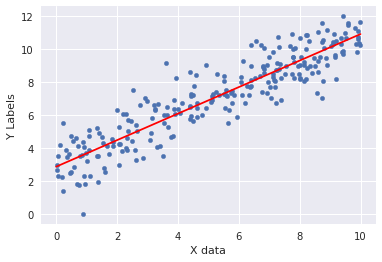

In [27]:
df_training.sample(250).plot(kind='scatter',x='X data',y='Y Labels')
plt.plot(x_predict,predictions,'r')

In [28]:
estimator.params

{}